# Homework 5

## ASTR 5900, Fall 2017, University of Oklahoma

### Bayesian Statistics

# Problem 1

Here you are to have a qualitative and quantitative discussion on the differences between frequentist and Bayesian statistics.

In the year 3001, students at the University of Mars are projecting their final grades in a machine learning course.  Students in this machine learning course are examined every Earth week, and five weeks have passed in the semester.  One such student, Calculon, has received scores of 92, 84, 95, 100, and 93 thus far.  Calculon believes that his scores in the first few weeks of class will be reflected in the rest of the semester.

For this problem you may make assumptions about what is known about Calculon's test results, i.e. his underlying test score variance.  Such assumptions should be explained in your answers.

### Part A

If Calculon is a frequentist, what would he predict to be his final score in the course?  What would he say about the uncertainty of his score?  Calculate these results.

In [1]:
import scipy.stats as sstats
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from astropy.io import ascii
from astropy.table import Table

In [2]:
scores = [92,84,95,100,93]

var = chisquare(scores)
mean = np.average(scores)
std = np.std(scores)
print("His final score would be: {0:.2f} +/- {1:.2f}".format(mean,std))

His final score would be: 92.80 +/- 5.19


### Part B

If Calculon is a Bayesian, what would he predict his final score to be?  What is his confidence in this prediction?  Find these information numerically.  Since Calculon is a Bayesian in this example, he needs to choose a reasonable prior.  He notes that the average grade in the section from the previous year was a 60.  **Hint**: For the prior, think about how grades are designed to be distributed in classes.

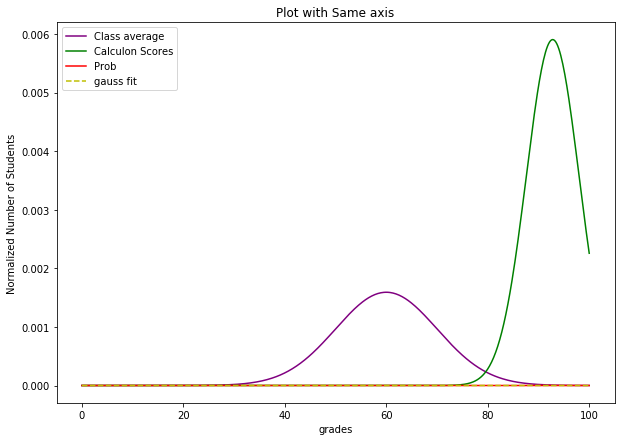

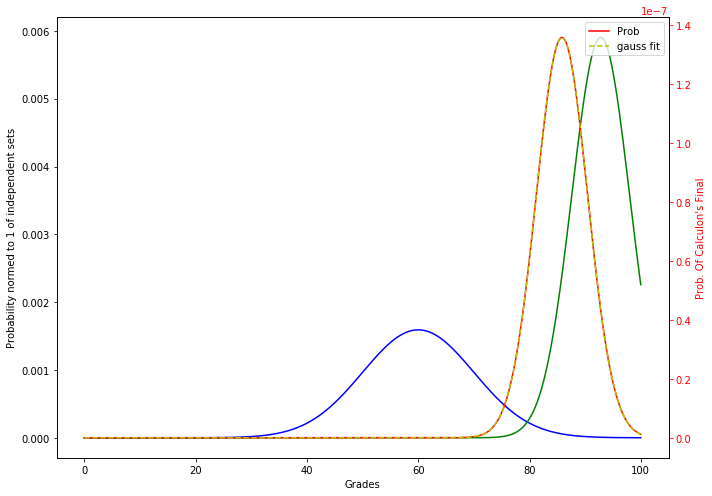

Gaussian: gauss(x,mu1,sigma1,A1): 85.835,4.6081,1.3578e-07
He would predict his score to be 85.835 +- 4.6081


In [3]:
# grade distribution of model
std_mean = 60.
std_std = 10. # i am assuming grades std is 10

# linspace to use
x = np.linspace(0,100,500)

# gaussian
def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/2./sigma**2)



calc_scores = gauss(x,mean,std,1./(2*np.pi*std**2))
classprior = gauss(x,std_mean,std_std,1./(2*np.pi*std_std**2))
#calc_conv = np.convolve(classprior,calc_scores,mode='same')
calc_conv = (classprior*calc_scores)

_expected1=(mean,1.0,1.0)
_params1,_cov1=curve_fit(gauss,x,calc_conv,_expected1)
_sigma1=np.sqrt(np.diag(_cov1))


# plotting
plt.clf()
plt.figure(figsize=[10,7])
lin1 = plt.plot(x,classprior,color="purple",label='Class average')
lin2 = plt.plot(x,calc_scores,color="green",label='Calculon Scores')
lin3 = plt.plot(x,calc_conv,color="red",label='Prob')
lin4 = plt.plot(x,gauss(x,*_params1),'y--',label='gauss fit')
plt.xlabel("grades")
plt.ylabel("Normalized Number of Students")
plt.title("Plot with Same axis")
plt.legend()

plt.show()

plt.clf()

fig, ax1 = plt.subplots(figsize=[10,7])
ax1.plot(x,classprior,color="blue",label='Class average')
ax1.plot(x,calc_scores,color="green",label='Calculon Scores')
ax1.set_xlabel('Grades')
ax1.set_ylabel('Probability normed to 1 of independent sets', color='black')
ax1.tick_params('y', colors='black')

ax2 = ax1.twinx()
ax2.plot(x,calc_conv,color="red",label='Prob')
ax2.plot(x,gauss(x,*_params1),'y--',label="gauss fit")

ax2.set_ylabel('Prob. Of Calculon\'s Final', color='r')
ax2.tick_params('y', colors='r')
plt.legend()

fig.tight_layout()
plt.show()

print('Gaussian: gauss(x,mu1,sigma1,A1): {0:.5},{1:.5},{2:.5}'.format(*_params1))
print('He would predict his score to be {0:.5} +- {1:.5}'.format(_params1[0],_params1[1]))

# Problem 2

Use Bayesian methods to estimate the parameters of the spectral data from HW4.

### Part A

Write down, in $\LaTeX$ preferably, the likelihood of obtaining a measurement $x_i$ from a model that is a mixture of two Gaussian distributions and a uniform distribution.  

In some sense there are 7 parameters total: the amplitudes of the Gaussians and uniform distributions (3), and the mean and variance of the Gaussians (4).  However, the normalization condition ensures that the 3 amplitudes are related.

In [4]:
'''
# image opener
imagename = "hw5-nickalaskreynolds-problem2ab.jpg"
#size = (700,1024)
original = Image.open(imagename)
original.rotate(90)
original.thumbnail(size)
original.show() 
'''
print('Run code above to open image')

Run code above to open image


p({$x_{i}$}|$\mu_1,\sig_1,A_1,\mu_2,\sig_2,A_2,A_3$) = $A_1 \times e^{\frac((x_i - \mu_1)^2)(2\sig_1^2)} + A_2 \times e^{\frac((x_i - \mu_2)^2)(2\sig_2^2)} + A_3$

### Part B

Again using $\LaTeX$, write down a reasonable prior for the amplitudes of the Gaussians.

## Look above for picture or...


p({$A_1,A_2$}| I) = constant

### Part C

Load data generated from the a probability distribution with the shape of the emission line data from HW4.  This data is located at `line-sample.dat` from the class GitHub repository.

Sample the posterior distribution (that you must determine from the previous parts of this HW) on a grid of possible values for the amplitudes of the components (two Gaussians plus a background)  What is the resulting point estimates and credible region for the amplitudes?  How do these estimates compare to the curve fit results from HW4?  

Note that your estimates in *this* problem will not resemble the optimal parameters found in HW4 due to the fact that the curve in HW4 is not normalized.  You may wish to find a normalization factor to compare your results.

In [5]:
edata = ascii.read("emission-line.dat")

def bimodalconstant(x,mu1,sigma1,A1,mu2,sigma2,A2,A3):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2) + A3

def sigma2Gamma(sigma):
    '''Function to convert standard deviation (sigma) to FWHM (Gamma)'''
    return sigma * np.sqrt(2 * np.log(2)) * 2 / np.sqrt(2)

Non normalized
Gaussian: bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2,A3,A4): 1.675,-2.1631,1.2024,0.13166,-1.0345,1.5212,4.6443


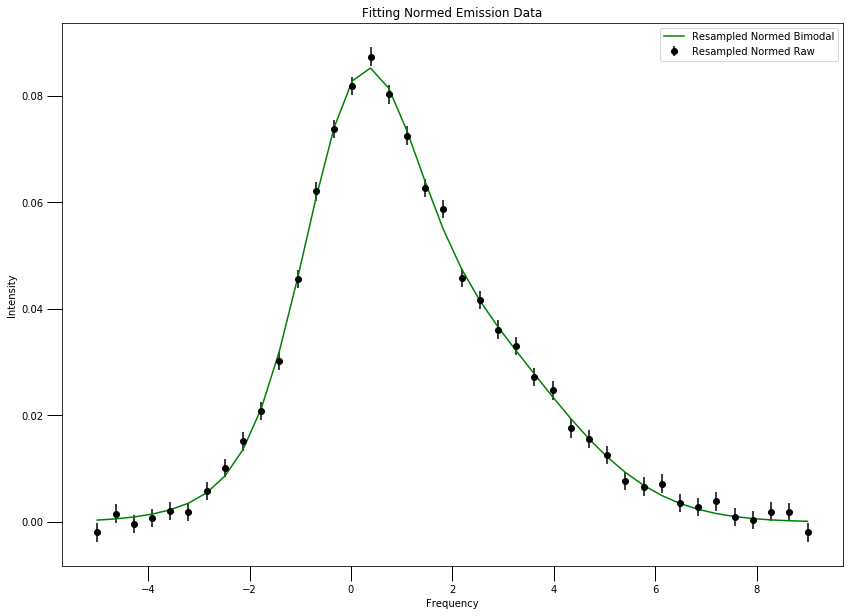

HW4 Chi-squared: 0.09287 vs this chi2: 0.012296
The credible regions for the amplitude will be: max(data) ~ Amplitude > 0. 


In [32]:
col1="Frequency"
col2="Intensity"

_expected2=[1. for x in range(7)]
_params2,_cov2=curve_fit(bimodalconstant,edata[col1],edata[col2],_expected2)
_sigma2=np.sqrt(np.diag(_cov2))

chi2_bimodal=chisquare(edata[col2],bimodalconstant(edata[col1],*_params2))

print('Non normalized')
print('Gaussian: bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2,A3,A4): {0:.5},{1:.5},{2:.5},{3:.5},{4:.5},{5:.5},{6:.5}'.format(*_params2))

resampled = edata[col2] - _params2[len(_params2)-1]

_expected3=[1. for x in range(7)]
_params3,_cov3=curve_fit(bimodalconstant,edata[col1],resampled,_expected3)
_sigma3=np.sqrt(np.diag(_cov3))

chi2_bimodal2=chisquare(edata[col2],bimodalconstant(edata[col1],*_params3))

norm = [float(i)/sum(resampled) for i in resampled]
resampled_bimodal = bimodalconstant(edata[col1],*_params3)
###########################

plt.clf()
plt.figure(figsize=(14,10))

plt.title("Fitting Normed Emission Data")
plt.xlabel("Frequency")
plt.ylabel("Intensity")
plt.tick_params('both', which='major', length=15, width=1)
plt.tick_params('both', which='minor', length=7.5, width=1)

'''
plt.errorbar(edata[col1], edata[col2], yerr=0.05, fmt='o',label="Raw",color="black")
line2 = plt.plot(edata[col1],bimodalconstant(edata[col1],*_params2),color='green',label='Bimodal')
'''
'''
plt.errorbar(edata[col1], resampled, yerr=0.05, fmt='o',label="Resampled Raw",color="black")
line2 = plt.plot(edata[col1],resampled_bimodal,color='green',label='Resampled Bimodal')
'''
plt.errorbar(edata[col1], norm, yerr=0.05/sum(resampled), fmt='o',label="Resampled Normed Raw",color="black")
line3 = plt.plot(edata[col1],resampled_bimodal/sum(resampled),color='green',label='Resampled Normed Bimodal')

plt.legend()
plt.show()

##########################

hw4_chi2 = 0.092869812388335082
print("HW4 Chi-squared: {0:.5} vs this chi2: {1:.5}".format(hw4_chi2,chi2_bimodal[0]))
print('The credible regions for the amplitude will be: max(data) ~ Amplitude > 0. ')

Progress...
1/100
26/100
51/100
76/100
Done


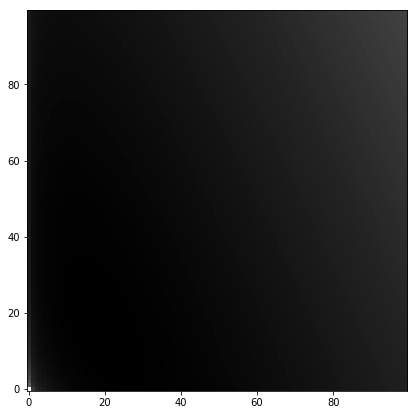

In [29]:
xk = edata[col1]
def generate_data():
    dks = bimodalconstant(xk, *_params3)
    nks = np.random.poisson(dks)
    plt.bar(xk, nks)
    return nks
    
Nk = generate_data()

def log_posterior(a,b):

    Dk = bimodalconstant(xk,_params3[0],_params3[1], a,_params3[3],_params3[4], b,_params3[6])
    return np.sum(Nk*np.log(Dk) - Dk)

n_samples = 100
As = np.linspace(0,max(edata[col2]) , n_samples)
Bs = np.linspace(0, max(edata[col2]), n_samples)

# could also split this up between processors
#since only utilizing one, too much effort though

post_grid = np.zeros((n_samples, n_samples))
print("Progress...")
for i, a in enumerate(As):
    if i%25 == 0:
        print("{}/{}".format(i+1,len(As)))
    for j, b in enumerate(Bs):
        
        post_grid[i,j] = log_posterior(a,b)

print("Done")
#print post_grid
# post_grid -= np.max(post_grid)
plt.clf()
plt.figure(figsize=[10,7])
plt.imshow(post_grid, origin='lower',
          cmap='Greys')
plt.show()

Non normalized best parameters:
(1.1620202020202022, 1.3798989898989902)
Normalized:
(0.0054071343245629564, 0.0064209720104185112)
Vs my curvefit:
(0.0077943559041801364, 0.0055949186975623958)


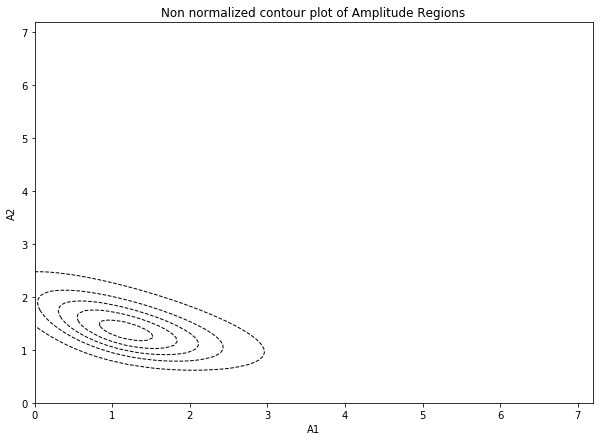

In [31]:
max_val = np.max(post_grid)
max_ind = np.argmax(post_grid)
#print(post_grid.shape)
#print(max_ind)
B_2d, A_2d = np.meshgrid(As, Bs)

#print(A_2d.shape)

A_2d = A_2d.flatten()
B_2d = B_2d.flatten()

#print(A_2d.shape)

A_best = A_2d[max_ind]
B_best = B_2d[max_ind]

print("Non normalized best parameters:")
print(A_best, B_best)
print("Normalized:")
print(A_best/np.sum(edata[col2]), B_best/np.sum(edata[col2]))
print("Vs my curvefit:")
print(_params3[3]/np.sum(edata[col2]),_params3[5]/np.sum(edata[col2]))
levels = np.log(np.array([.1, .3, .5, .7, .9]))+max_val

X, Y = np.meshgrid(Bs, As)
plt.clf()
plt.figure(figsize=[10,7])
CS = plt.contour(Y, X, post_grid, levels, colors='k', linewidths=1)
plt.xlabel('A1')
plt.ylabel('A2')
plt.title("Non normalized contour plot of Amplitude Regions")
plt.axis([0, max(edata[col2]), 0, max(edata[col2])])
plt.show()

### Part D

For each of the amplitudes, marginalize over the other amplitudes (and nuisance parameters).  Use the marginalized pdf to find new point estimates as the posterior means.  Compare to your previous results.

You may compute these integrals numerically by performing Riemann sums with `numpy`.

### See above

### Part E

What would this problem be like if it had asked you to find point estimates for all of the distribution parameters in Part A?  What difficulties would emerge and why?  What if you had 100 model parameters?  1000?

#### This is an exponential problem. In part D you reduce the phase space from 7 variables into 2. This makes the calculations much faster. However, which each iteration of a new parameters, you would have to integrate over it with respect to every other parameters as well. So To marginalize 100 parameters, you have to integrate(marginalize) 100 times, etc on to 1000 and beyond.

## Not proud of this assignment as I pretty much copy/pasted the code from the lecture.